# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Question 1](#toc1_)    
  - 1.1. [Changing values of $\frac{H_F}{H_M}$ for various $\alpha$ and $\sigma$](#toc1_1_)    
  - 1.2. [Results and interpretation](#toc1_2_)    
- 2. [Question 2](#toc2_)    
  - 2.1. [Solving the model for a discrete choice set](#toc2_1_)    
  - 2.2. [Results from solving the discrete model](#toc2_2_)    
- 3. [Question 3](#toc3_)    
  - 3.1. [Solving the model for a continuous choice set](#toc3_1_)    
  - 3.2. [Results from solving the continuous model](#toc3_2_)    
- 4. [Question 4](#toc4_)    
  - 4.1. [Procedure](#toc4_1_)    
  - 4.2. [Minimizing the function](#toc4_2_)    
  - 4.3. [Interpretation of the results](#toc4_3_)    
- 5. [Question 5](#toc5_)    
  - 5.1. [Expanding the model](#toc5_1_)    
  - 5.2. [Regressing the model](#toc5_2_)    
  - 5.3. [Plotting the solution](#toc5_3_)    
- 6. [Conclusion](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports and set magics:

In [15]:
import numpy as np
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import packages for plots etc. 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import ipywidgets as widgets # For interactive plots/buttons
import itertools as it
# Import your own code
import inauguralproject 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Question 1](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Changing values of $\frac{H_F}{H_M}$ for various $\alpha$ and $\sigma$](#toc0_)

The model is specified in the class "HouseholdSpecializationModelClass", which contains all model equations and methods used for solving the different questions in the assignment. 

We create an instance of the class:

In [16]:
model = inauguralproject.HouseholdSpecializationModelClass() # Create instance of model class

In order to illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we solve the model discretely for different combinations of the parameters $\alpha$ and $\sigma$ and assign the outputs to a matrix presenting the results.

**Procedure**
1. We construct lists of the required parameter values of $\alpha$ and $\sigma$

2. We construct a nested loop (using `itertools.product`) that solves the model discretely for each combination of $\alpha$ and $\sigma$ and returns the ratio $\frac{H_F}{H_M}$

3. We assign the solutions to a dataframe displaying the ratio betweeen $H_F$ and $H_M$ for all relevant combinations of $\sigma$ and $\alpha$

In [17]:
# Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

# Construct table
df = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))


# Solve model for different parameter values and add resulting HF/HM to table
for i,j in it.product(alpha_list,sigma_list):
    model.par.alpha = i
    model.par.sigma = j
    opt = model.solve_discrete()
    df.loc[j,i] = f'{opt.HF / opt.HM :.2f}'

# Print table
print(df)



sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


### 1.2. <a id='toc1_2_'></a>[Results and interpretation](#toc0_)

From this matrix we observe that as $\alpha$ increases for a fixed $\sigma$, then $\frac{H_F}{H_M}$ increases as well. The interpretation is that when $\alpha$ increases females become more productive in home production relative to males, thus a higher $\alpha$ implies that the $\frac{H_F}{H_M}$ is higher in the household's optimal allocation. Moreover, we see that when $\alpha >0.5$ women are more productive in home production than men, which for any value of $\sigma$ implies a ratio above 1, meaning that the female member of the household provides relatively more hours working at home. On the other hand, if $\alpha < 0.5$ men are more productive in home production than women implying that men provides more hours working at home than women, i.e., the ratio is below 1 for any given $\sigma$. Finally when men and women are equally productive in home production, i.e. $\alpha = 0.5$, they provide an equal amount of hours working at home.

Considering the elasticity of substitution, $\sigma$, we observe that when $\alpha = 0.5$, i.e, when men and women are equally productive, varying $\sigma$ does not affect the ratio. However, when women are more productive than men in home production, then a higher $\sigma$ will imply a lower ratio, and similarly when men are more productive in home production than women a higher $\sigma$ implies a higher ratio. The interpretation is that when the elasticity of substitution is higher, then a marginal change in the productivity of women relative to men will have a larger effect on the optimal ratio. Thus, a marginal decrease in $\alpha$ results in a larger drop in the ratio, and a marignal increase in $\alpha$ implies a larger increase in the ratio.

## 2. <a id='toc2_'></a>[Question 2](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Solving the model for a discrete choice set](#toc0_)

In this section, we will plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in [0.8,0.9,1.0,1.1,1.2]$. As we evaluate $\log \frac{w_F}{w_M}$ for a fixed $w_M=1.0$, we can plot $\log \frac{H_F}{H_M}$ against $\log w_F$.

**Procedure**
1. We start by resetting $\alpha$ and $\sigma$ to its baseline values.
2. Next, we use the `py.solve_wF_vec(discrete=True)` method to solve the optimization problem discretely for different values of $w_F$. This method loops through the different values of $w_F$ and solves the discrete model for each of these values.
3. Next, we define the $\log \frac{H_F}{H_M}$-vector and assign the solutions to this variable.
4. Finally, we plot the solutions for $\log \frac{H_F}{H_M}$ against the different values of $\log w_F$ by using matplotlib.pyplot.

The code for this procedure is implemented in `py.plot(discrete=True)`.

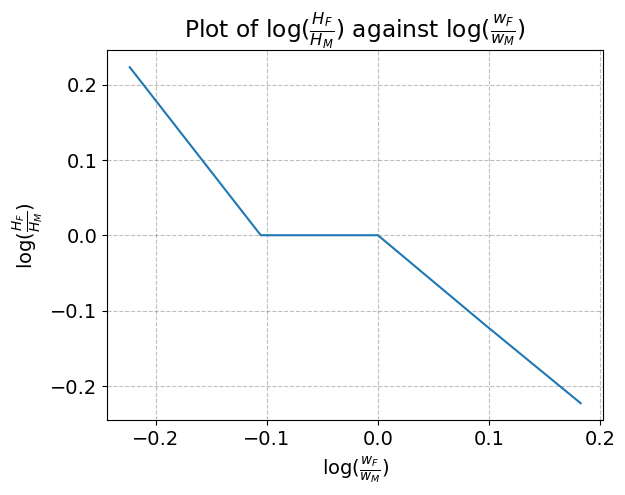

In [18]:
# reset parameters to baseline values
model = inauguralproject.HouseholdSpecializationModelClass()

# Calling the plot-function from the py-file with the keyword argument 'discrete=True'. This references other functions and first solves and then plots the discrete solution
model.plot(discrete=True)


### 2.2. <a id='toc2_2_'></a>[Results from solving the discrete model](#toc0_)

The figure shows a negative relationship between $\log\frac{H_F}{H_M}$ and $\log\frac{w_F}{w_M}$. That is as $\log\frac{w_F}{w_M}$ increases, i.e., the wage of the female member increases relative to the male member, then the $log\frac{H_F}{H_M}$ decreases. The intuition is that when the female labor wage increases, the return on female labor increases relative to male members. Therefore, it is optimal for the household to let female members to substitute towards more hours working in the labor market and for male members to provide more hours working in the house.

We observe that when $\log\frac{w_F}{w_M} = 0$, the wage of men and women is equal, and as we have assumed that $\alpha = 0.5$ (i.e. equal productivity in home production for male and female member), then the female member has no comparative advantage in home production compared to men and vice versa, hence they will provide an equal amount of hours working at home (i.e., $\log\frac{H_F}{H_M}=0$). 

We also note the kink in the plot, which is due to the discrete choice set implying that we get approximation errors.

## 3. <a id='toc3_'></a>[Question 3](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Solving the model for a continuous choice set](#toc0_)

In this section we are again asked to plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in [0.8,0.9,1.0,1.1,1.2]$. However, now we assume that the choice set is continuous, i.e. $L_M, L_F, H_M, H_F \in [0,24]$.

**Procedure**
1. First, we solve the continous model for the different values of $w_F$ by calling the method `py.solve_wF_vec(discrete=False)`.
2. Next, we assign the different solutions to the log-ratio vectors. 
3. Finally, we plot the solutions by using matplotlib.pyplot. 

The code for this procedure is implemented in `py.plot(discrete=False)`.

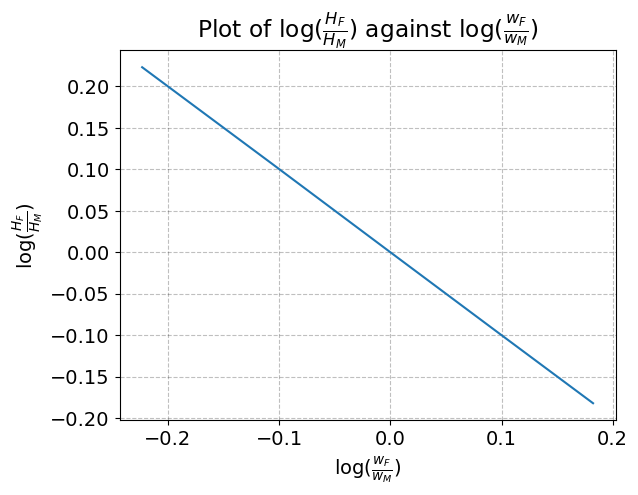

In [19]:
# Calling the plot-function from the py-file with the keyword argument 'discrete=False'. This references other functions and first solves and then plots the continuous solution
model.plot(discrete=False)

### 3.2. <a id='toc3_2_'></a>[Results from solving the continuous model](#toc0_)

The results of solving the model with a continous choice set are presented in the plot above. 

First of all, we can highlight that we now observe a completely smooth line plot. This is because we no longer get approximation errors from the grid search approach used in the discrete solution above. 
- It might be added that we tested different optimizers for solving the continous model, and found that the results aligning with our expectations of the solution to the model were best reflected when using the `'SLSQP'`-optimizer. For instance, the `'nelder-mead'`-optimizer resulted in odd "spikes" in the function values, which in all likelihood was not a product of the function optimized, but rather the optimizer performing oddly.




## 4. <a id='toc4_'></a>[Question 4](#toc0_)




### 4.1. <a id='toc4_1_'></a>[Procedure](#toc0_)

We are asked to estimate the values of $\alpha$ and $\sigma$ that minimizes the squared deviations from the target regression coefficients. This function is expressed as: $(\beta_0-\hat{\beta_0})^2+(\beta_1-\hat{\beta_1})^2$. 

**Procedure**
1. First, we solve the model continously for the female wages vector for some given $\alpha$ and $\sigma$ values.
2. Next, we run the regression $ \log \frac{H_F}{H_M}=\beta_0+\beta_1 \log \frac{w_F}{w_M} $ on the results from step 1 to estimate $\hat{\beta_0}$ and $\hat{\beta_0}$. For the given estimation results we compute the resuling function value of the squared deviation.
3. Now, we minimize the squared deviation function with relation to the values of $\alpha$ and $\sigma$. We implement this using the numerical optimizer `Nelder-mead` as this is an unconstrained minimization problem. Thereby, we find the values of $\alpha$ and $\sigma$ that yield the regression coefficient values of interest.
4. Finally, we plot the function values of the squared deviation function for different combinations of $\alpha$ and $\sigma$ in a 3D-plot using matplotlib.pyplot.

Step 1-3 is implemented in `py.estimate()`, while step 4 is implemented in `py.plot_modelfit()`

### 4.2. <a id='toc4_2_'></a>[Minimizing the squared residuals](#toc0_)

In [20]:
model.estimate(do_print=True) # calling the estimate function from the py-file

The optimized parameter values are:
Alpha =  0.983
Sigma =  0.099

The resulting regression coefficients are:
Beta0 =  0.400
Beta1 = -0.100

The resulting minimized squared deviation from the target coefficients is:
Squared deviation =  0.000


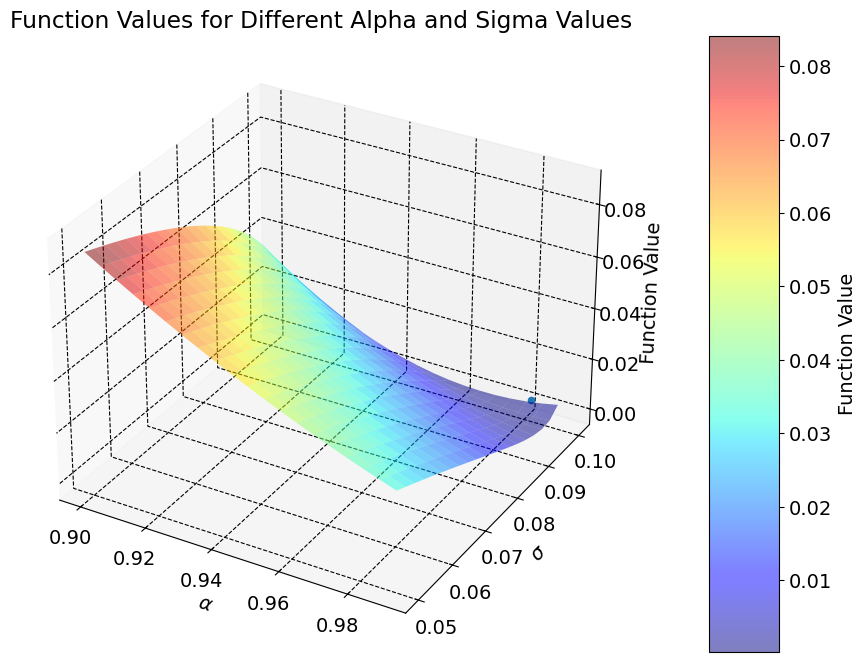

In [21]:
model.plot_modelfit(N=20) # calling the plot_modelfit function from the py-file. Specifying N=20 to create a grid with 20 points

### 4.3. <a id='toc4_3_'></a>[Interpretation of the results](#toc0_)

As mentioned earlier, when $\alpha=0.5$ men and women are equally productive at home production. The regression yeilds that the optimal value of $\alpha = 0.983$. That is the value of $\alpha$ that minimizes the squared deviation, is very close to 1. This implies the results from Siminski and Yetsenga (2022) indicates that women is more productive in home production than men. Actually, the model requires that women are $\frac{0.983}{1-0.983}=57.8$ times more productive than men in home production in order to match data.

The estimated $\sigma$ that minimizes the squared deviation is 0.099. The interpretation is that there is a low degree of substitution between men and women in house production. 

The parameter estimate from Siminski and Yetsenga (2022), $\beta_1=-0.1$, implies that when the relative wage between men and women increases by 1%, then the relative hours worked at home will decrease by 0,1%. I.e when women earn relatively more on the labor market the hours they spent working a home will fall, but it will not fall with the same amount as the wage increase. This is due the low degree of substitution between the input factors in home production, men and women. 

## 5. <a id='toc5_'></a>[Question 5](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Expanding the model](#toc0_)

From the results in **4.2** we saw that in order to match data, we needed that females are 57.8 times more productive in home production than men. This result is probably not very realistic, and therefore we now seek to expand the model such that it can match data for $\alpha=0.5$, i.e. when males and females are equally productive in home production. This is implemented by changing the changing the utility function such that it now allows for men and women having different disutilities from home production:

$$
U = \frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)-\kappa H_{M}-(1-\kappa)H_{F}, \quad \rho>1, \nu>0, \epsilon>0, \kappa \in [0,1]
$$

In this version of the model, $\frac{\kappa}{1-\kappa}$ is the disutility from home production for men relative to women.
To specify the size of $\kappa$ correctly, we regress the equation above and estimate a value for $\kappa$ that fits the assumption of $\alpha=0.5$. Here, we would expect $\hat{\kappa}>0.5$ as this would imply that men face a higher disutility from home production than women.

Beware that we also return an estimate of $\sigma$. However, as shown in question 1, the relative allocation of home production between men and women is unaffected by the size of $\sigma$ when $\alpha=0.5$, and therefore the value of $\sigma$ has no effect on the regression coefficients when $\alpha=0.5$.

**Procedure**

1. By using the keyword argument `"extension=True"` in all relevant functions in `HouseholdSpecializationModelClass()`, we first solve the extended model for the female wage vector for $\alpha=0.5$ and some given values of $\kappa$ and $\sigma$. 
2. Next, follow step 2-3 from **4.1**, where we just solve the minimization problem wrt. $\kappa$ and $\sigma$ instead of $\alpha$ and $\sigma$.
3. Finally, we plot the function values of the squared deviation function against different values of $\kappa$ in a 2D-plot. Note again, that the values of $\sigma$ is irrelevant for the squared residuals when $\alpha=0.5$, and therefore we only focus on how the squared residuals changes for different values of $\kappa$.

Step 1-2 are implemented in `py.estimate(extension=True)` and step 3 is implemented in `py.plot_modelfit(extension=True)`.

### 5.2. <a id='toc5_2_'></a>[Minimizing the squared residuals](#toc0_)

In [25]:
model = inauguralproject.HouseholdSpecializationModelClass() # Reset parameter values to baseline
model.estimate(extension=True, do_print=True) # Estimate optimized parameter values for extended model.


The optimized parameter values are:
Alpha =  0.500
Sigma =  1.146
Kappa =  0.589

The resulting regression coefficients are:
Beta0 =  0.405
Beta1 = -0.025

The resulting minimized squared deviation from the target coefficients is:
Squared deviation =  0.006


As stated above, we find an optimal value $\kappa=0.589$. 

At this value of $\kappa$, the additional disutility of home production is $\frac{0.589}{1-0.589}=1.435$ times larger for men relative to women and thus exactly big enough for the men and women to choose the allocations of home production that is reflected in the data. 

We note that the squared residuals are slightly are greater than 0 for the estimation of the extended model. This is primarily reflected in the fact that $\hat{\beta_1}=-0.025$, while the target value is $\beta_1 = -0.1$. 



### 5.3. <a id='toc5_3_'></a>[Plotting the solution](#toc0_)

To show that this $\kappa$ does in fact minimize the function value, we show the results of the regression against different values of $\kappa$ in the plot below. 

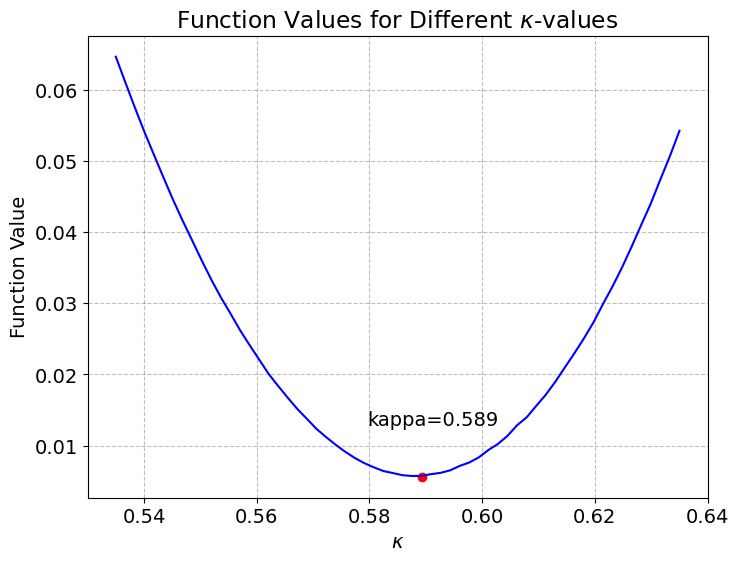

In [23]:
model.plot_modelfit(N=60, extension=True) # Plot model fit for different values of kappa

## 6. <a id='toc6_'></a>[Conclusion](#toc0_)

In this project, we have solved the model given in the assignment "Time Use of Couples". The project explores the division of labor in the home and in the market between males and females and how this work division impacts the aggregate utility of the household.

1. Firstly, we calculate the optimal labor supply in the home for each of the two agents for various home productivity levels and for different elasticities of substitution (between male and female labor supply). 
2. Next, we compare the relative home labor supply between females and males for five different female wages levels, where the choice set of labor supply is discreet. 
3. Next, we do the exact same as in question 2 for a continuous choice set of labor supply.
4. We then apply the model to choose the values of $\alpha$ and $\sigma$ that minimizes the squared deviation from data moments. We find that the optimal values are $\alpha=0.983$ and $\sigma=0.099$
5. Lastly, we expand our model so we allow for a different disutility of home production between males and females using the parameter $\kappa$. We then regress the new model and estimate a value of $\kappa$ that fits the data for $\alpha=0.5$. We find that $\kappa=0.589$ is the optimal value. Furthermore, we plot the function value against different values of $\kappa$ to show that $\kappa=0.589$ is the optimal value.

